**Name : Archana Kalburgi**

**CWID : 10469491**

**Solution to Question 2**

Steps involved:

1. Read data 

2. Visualise the data points

3. Calculate the mean vectors for different classes 

4. Calculate Within-class scatter matrix s_w

5. Calculate Between-class scatter matrix s_b

6. Solve the generalized eigenvalue problem for the matrix

7. Select linear discriminants for the new feature subspace

8. Sort the eigenvectors by decreasing eigenvalues

9. Choose k eigenvectors with the largest eigenvalues

10. Transform the samples onto the new subspace

11. Show the miss classified points (scatter plot of all the points)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# data
c0 = np.array([[-2, 1], [-5, -4], [-3, 1] , [0, -3], [-8, -1]])
c1 = np.array([[2,5], [1,0], [5, -1], [-1, -3], [6, 1]])
all_data = np.concatenate((c0, c1))

mean0 = c0.mean(axis=0)
mean1 = c1.mean(axis=0)
overall_mean = all_data.mean(axis=0)

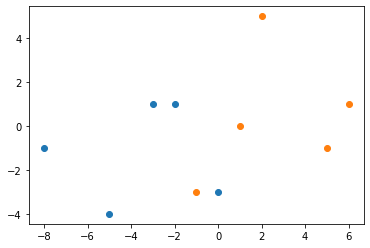

In [ ]:
# Data visualisation 
plt.scatter(c0[:, 0], c0[:, 1])
plt.scatter(c1[:, 0], c1[:, 1])

In [ ]:
# mean vectors for different classes
mean0 = c0.mean(axis=0)
mean1 = c1.mean(axis=0)
mean_overall = all_data.mean(axis=0)

In [ ]:
# Calculate Within-class scatter matrix s_w
features = all_data.shape[1]
s_w0 = (c0 - mean0).T.dot(c0 - mean0)
s_w1 = (c1 - mean1).T.dot(c1 - mean1)

s_w = s_w0 + s_w1
s_w

array([[70.4, 10.2],
       [10.2, 56. ]])

In [ ]:
# Calculate Between-class scatter matrix s_b
mean_diff0 = (mean0 - mean_overall).reshape(features, 1)
mean_diff1 = (mean1 - mean_overall).reshape(features, 1)

nc0 = c0.shape[0]
nc1 = c1.shape[0]

s_b0 = nc0 * mean_diff0.dot(mean_diff0.T)
s_b1 = nc1 * mean_diff1.dot(mean_diff1.T)

s_b = s_b0 + s_b1
s_b

array([[96.1, 24.8],
       [24.8,  6.4]])

In [ ]:
# Solve the generalized eigenvalue problem for the matrix
A = np.linalg.inv(s_w).dot(s_b)

In [ ]:
# Select linear discriminants for the new feature subspace
evalues, evector = np.linalg.eig(A)
evector = evector.T

In [ ]:
# Sort the eigenvectors by decreasing eigenvalues
idx = np.argsort(abs(evalues))[::-1]
evalues = evalues[idx]
evector = evector[idx]

# Choose k eigenvectors with the largest eigenvalues
discriminants = evector[0:1] # bcoz we have on 2 dimensions, optimal direction

# Transform the samples onto the new subspace -> project the data
x_projected = np.dot(all_data, discriminants.T)
x_projected

array([[-1.8304135 ],
       [-5.53583808],
       [-2.81945135],
       [-0.44298661],
       [-8.05996502],
       [ 2.71638672],
       [ 0.98903785],
       [ 4.79752706],
       [-1.43202446],
       [ 6.08188932]])

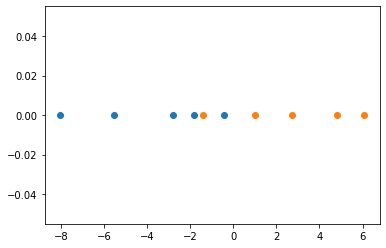

In [ ]:
# Show the miss classified points 
c1_projected = np.dot(c1, discriminants.T)
c0_projected = np.dot(c0, discriminants.T)

plt.scatter(c0_projected[:, 0], np.zeros(5))
plt.scatter(c1_projected[:, 0], np.zeros(5))